# ROC Curve and AUC

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at different classification thresholds. 

The Curve plots the True Positive Rate (TPR) on the y-axis and False Positive Rate (FPR) on the x-axis:

\begin{align}
        True Positive Rate = \frac{TP}{TP+FN}
    \end{align}


\begin{align}
        False Positive Rate = \frac{FP}{FP+TN}
    \end{align}

The TPR and FPR are evaluated at different decision threholds, lowering the threshold causes the model to identify more items as possitive, and increases both False Positives and True Positives. A typical ROC curve is shown below: 

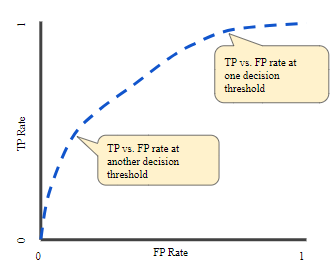

Let's construct an ROC curve manually. 

In [4]:
import numpy as np
def true_positive(y_pred:np.array, y_true:np.array):
  return ((y_true==1) &(y_pred==1)).sum()
def false_positive(y_pred:np.array, y_true:np.array):
  return ((y_true == 0) & (y_pred == 1)).sum()
def true_negative(y_pred:np.array, y_true:np.array):
  return ((y_true == 0) & (y_pred == 0)).sum()
def false_negative(y_pred:np.array, y_true:np.array):
  return ((y_true == 1) & (y_pred == 0)).sum()

def false_positive_rate(false_positives:np.array, true_negatives:np.array) -> float:
    return (false_positives/(false_positives+true_negatives))

def true_positive_rate(true_positives:np.array, false_negatives:np.array) -> float:
    return (true_positives/(true_positives+false_negatives))

In [11]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_informative=2, flip_y=0.25, random_state=42)


# Helper funcs
def get_prediction(proba_arr:np.array) -> int:
  if proba_arr[0] == 0:
    return 1
  return 0

def get_predictions_for_threshold(X:np.array,y:np.array, threshold:int) -> np.array:
  """
  returns predictions for a given threshold value (0 - 1)
  """
  clf.fit(X,y)
  decisions = (clf.predict_proba(X) >= threshold).astype(int)
  predictions = np.array([get_prediction(x) for x in decisions])
  return predictions

In [61]:
thresholds = np.arange(1e-3,1, 0.01)
len(thresholds)

100

In [62]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty = None)

preds_dict = {}
for i in thresholds:
    preds_dict[i] = get_predictions_for_threshold(X,y, i)

In [63]:
FPR = []
TPR = []

for k,v  in preds_dict.items():
    tp = true_positive(v, y)
    tn = true_negative(v, y)
    fp = false_positive(v, y)
    fn = false_negative(v, y)
    FPR.append(false_positive_rate(fp, tn))
    TPR.append(true_positive_rate(tp,fn))

In [44]:
threshold_locs = dict.fromkeys(np.round(thresholds,1),list(zip(FPR, TPR)))
threshold_locs[0.0][1]

(0.0, 0.52)

Text(0.5, 1.0, 'ROC Curve with Thresholds')

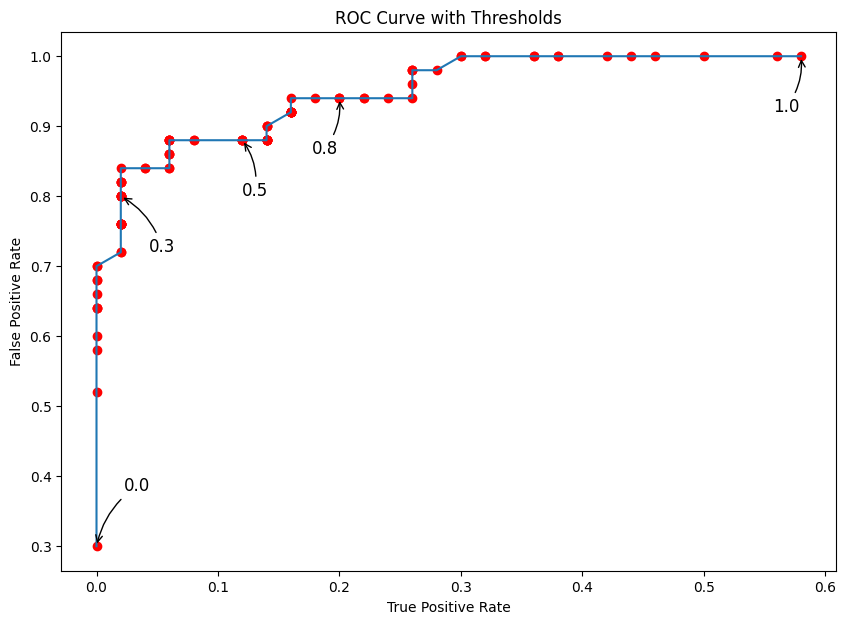

In [85]:
import matplotlib.pyplot as plt
plt.style.use('default')
fig, ax = plt.subplots(figsize = (10,7))
ax.plot(FPR, TPR)
ax.set_ylabel("False Positive Rate")
ax.set_xlabel("True Positive Rate")

## Adding threshold locations

ax.scatter(FPR, TPR, c = 'r', )
delta = 0.01

i = 0
ax.annotate(np.round(thresholds[i],1),
            xy=(FPR[i], TPR[i]), 
            xycoords='data',
            xytext=(20, 40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3,rad=.2"),
            fontsize=12)

i = 25
ax.annotate(np.round(thresholds[i],1),
            xy=(FPR[i], TPR[i]), 
            xycoords='data',
            xytext=(20, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3,rad=.2"),
            fontsize=12)

i = 50
ax.annotate(np.round(thresholds[i],1),
            xy=(FPR[i], TPR[i]), 
            xycoords='data',
            xytext=(0, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3,rad=.2"),
            fontsize=12)


i = 75
ax.annotate(np.round(thresholds[i],1),
            xy=(FPR[i], TPR[i]), 
            xycoords='data',
            xytext=(-20, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3,rad=.2"),
            fontsize=12)

i = 99
ax.annotate(np.round(thresholds[i],1),
            xy=(FPR[i], TPR[i]), 
            xycoords='data',
            xytext=(-20, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3,rad=.2"),
            fontsize=12)

ax.set_title("ROC Curve with Thresholds")

The ROC Curve gives an intuition of how well an algorithm is performing, but it's always nice to have a single value to compare different models. Luckily we have the AUc (Area under the curve), like the name suggests this value sums up the area under the ROC Curve, with a value of 1 being a perfect classifier, a value of 0.5 corresponding to a completely random classifier, and a value of 0 corresponds to an algorithm whos predictions are 100% wrong. 